In [19]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

# Загрузка данных

In [2]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [3]:
data = pd.read_excel('Data/data_ford_price.xlsx') 

#  Отбор признаков: мотивация

## Предобработка данных

In [4]:
data = data[['price','year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace = True)

y = data['price']
x = data.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

## Обучение модели

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4682.957


## Удаление избыточного признака

In [6]:
x.drop('lat', axis = 1, inplace = True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4672.930


#  Отбор признаков: классификация методов

## Метод рекурсивного исключения признаков

In [9]:
from sklearn.feature_selection import RFE

In [10]:
y = data['price']
x = data.drop(columns='price')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [12]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'lat'], dtype=object)

In [13]:
X_train.columns

Index(['year', 'cylinders', 'odometer', 'lat', 'long', 'weather'], dtype='object')

In [14]:
selector.ranking_

array([1, 1, 4, 1, 3, 2])

##  МЕТОДЫ ВЫБОРА ПРИЗНАКОВ НА ОСНОВЕ ФИЛЬТРОВ

In [15]:
from sklearn.feature_selection import SelectKBest, f_regression

In [16]:
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'odometer'], dtype=object)

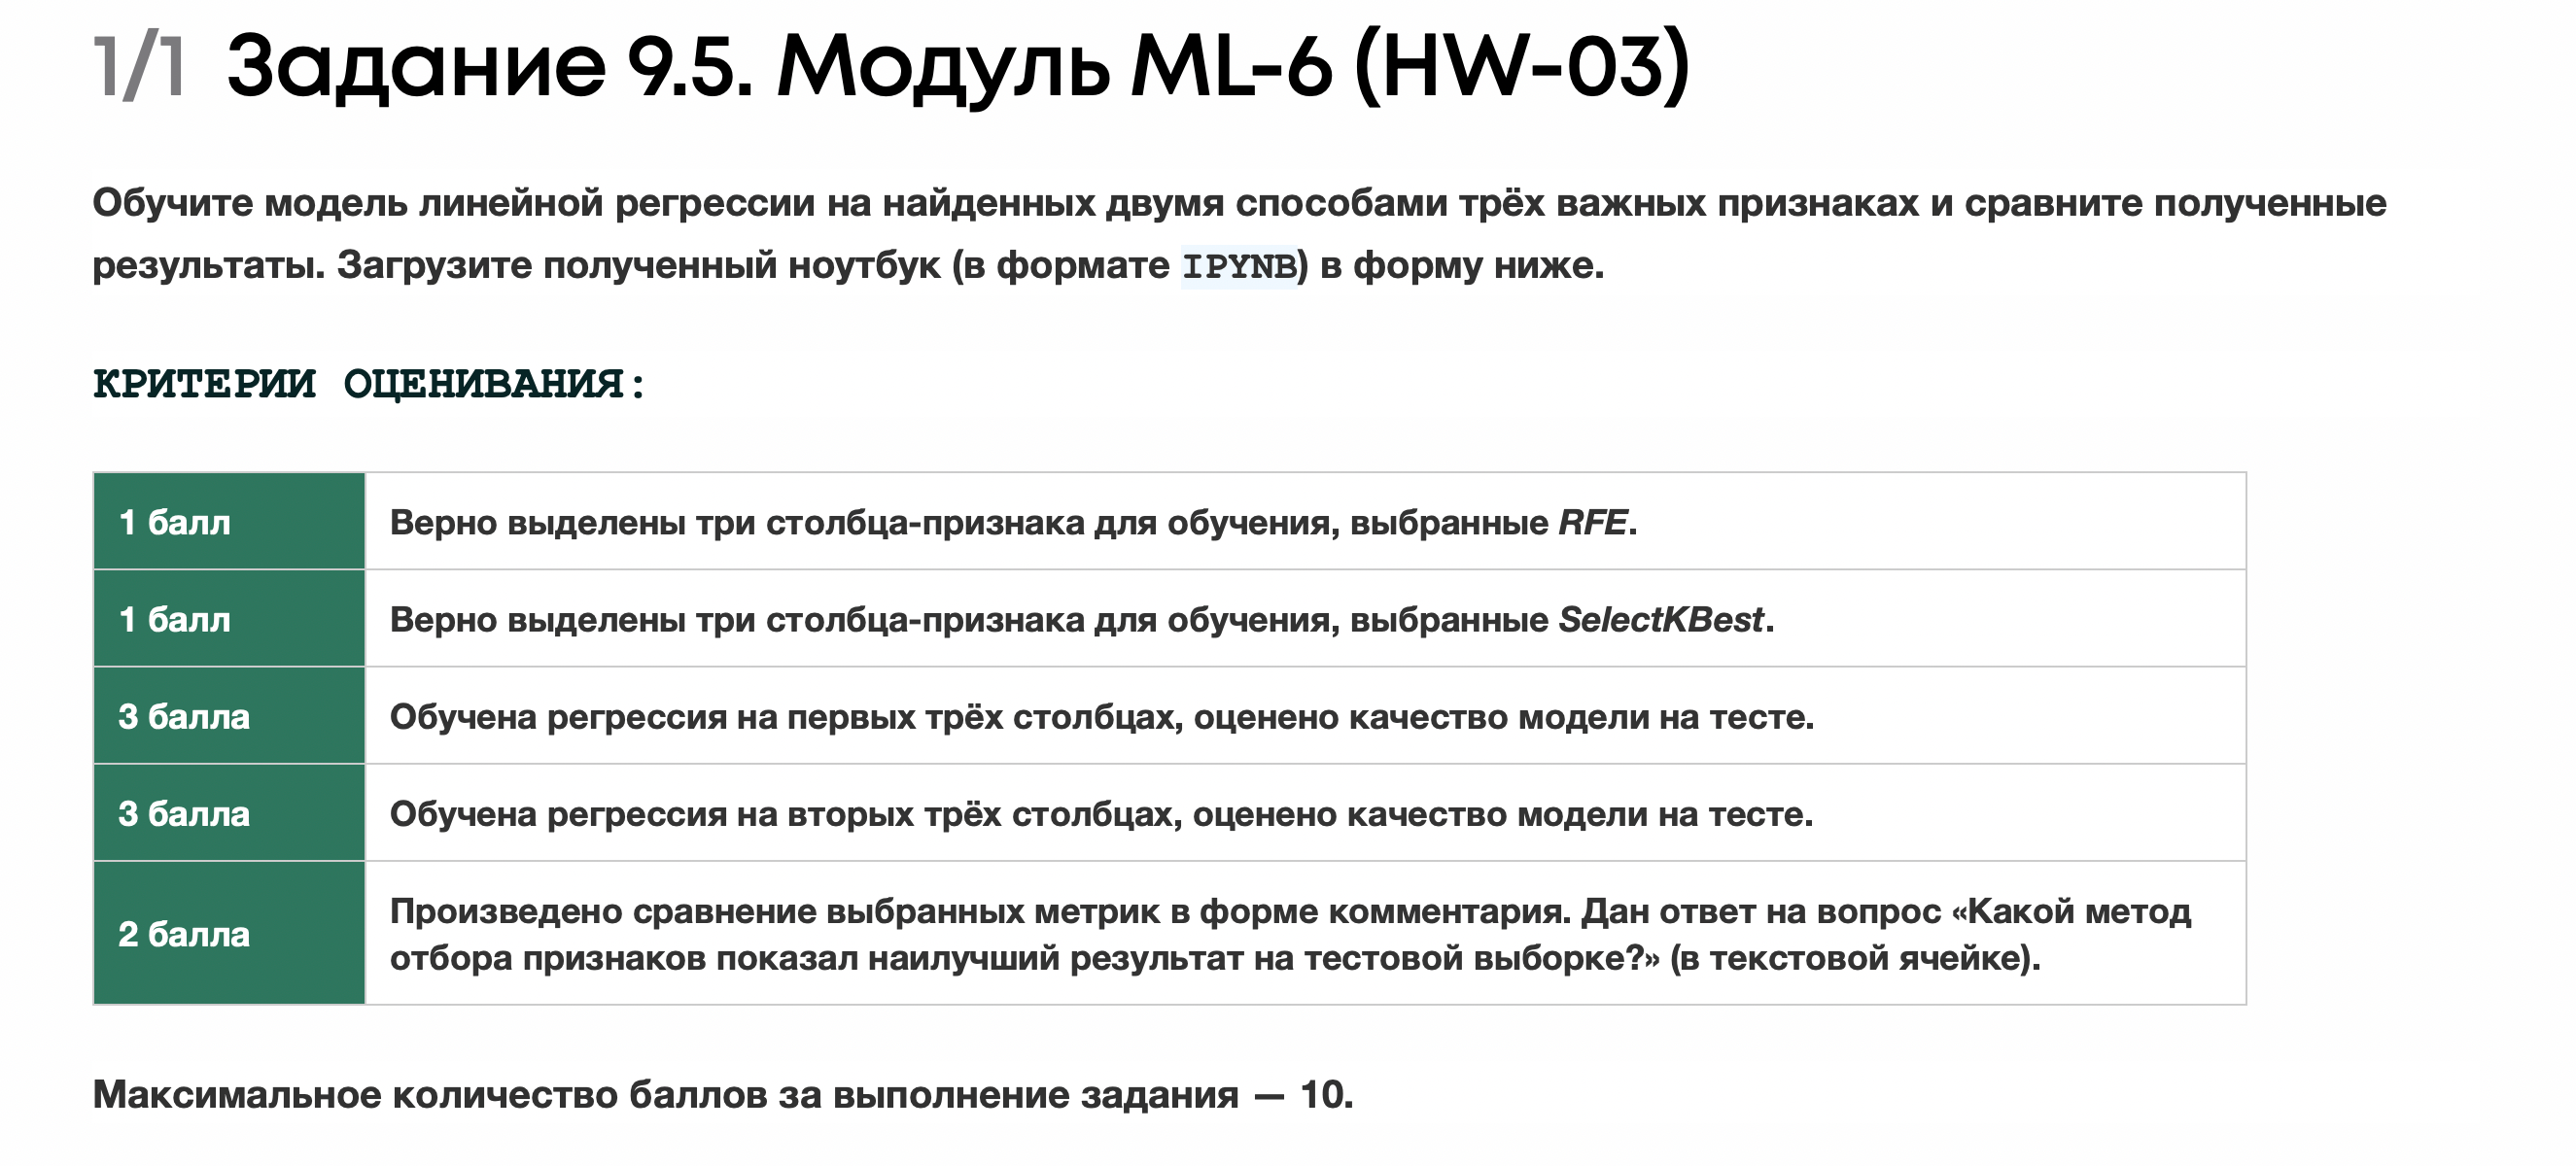

In [21]:
# Создадим массивы 3 главных признаков, полученных разными способами, и на их основе, произведём разбиение на обучающую и тестовую выборки
RFE_features=['year', 'cylinders', 'lat']
Kbest_features=['year', 'cylinders', 'odometer']
X_Kbest=x[Kbest_features]
X_RFE=x[RFE_features]
X_train_RFE, X_test_RFE, y_train_RFE, y_test_RFE = train_test_split(X_RFE, y, test_size=0.3, random_state=42)
X_train_KB, X_test_KB, y_train_KB, y_test_KB = train_test_split(X_Kbest, y, test_size=0.3, random_state=42)

In [22]:
# Создадим и обучим модель для главных 3 признаков, которые мы отобрали методом RFE, а затем всё то же самое, но для другого метода
model_RFE = LinearRegression()
model_RFE.fit(X_train_RFE, y_train_RFE)
y_predicted_RFE = model_RFE.predict(X_test_RFE)
MAE_RFE = mean_absolute_error(y_test_RFE, y_predicted_RFE)
RMSE_RFE = math.sqrt(mean_squared_error(y_test_RFE, y_predicted_RFE))
print('MAE_RFE: %.3f' % MAE_RFE)
print('RMSE_RFE: %.3f' % RMSE_RFE)

print('--'*20)

model_KBEST = LinearRegression()
model_KBEST.fit(X_train_KB, y_train_KB)
y_predicted_KB = model_KBEST.predict(X_test_KB)
MAE_KB = mean_absolute_error(y_test_KB, y_predicted_KB)
RMSE_KB = math.sqrt(mean_squared_error(y_test_KB, y_predicted_KB))
print('MAE_KBEST: %.3f' % MAE_KB)
print('RMSE_KB: %.3f' % RMSE_KB)

MAE_RFE: 5206.677
RMSE_RFE: 7044.150
----------------------------------------
MAE_KBEST: 4800.916
RMSE_KB: 6885.502


> Как мы видим, исходя из полученных значений функций ошибок MAE и RMSE, можно с уверенностью сказать, что метод выбора признаков на основе коррелляции Пирсона (в нашем случае) справился с выбором 3 главных фичей лучше, чем это сделал метод рекурсивного исключения признаков!